In [1]:
# pip install contractions

In [2]:
import pandas as pd
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords
import re
import string
import emoji
from nltk.corpus import wordnet
# import contractions

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
df = pd.read_csv('youtube_sentiment.csv')

In [5]:
comment_body = df['Comment']

In [6]:
comments=comment_body.to_numpy()

In [7]:
comments

array(['Just subscribed, downloading this and will watch in depth later. Excited to learn from what you guys have built',
       'Could you please do ERPnext tutorial ?',
       'I hate that this is where programming is headed. I’ve chosen the wrong career. So lame. ',
       ..., 'Cant wait to see browsers getting slower :D',
       'Great intro! This is a big step forward imho',
       'Damn Awesome Content 🔥'], dtype=object)

In [8]:
def remove_punctuation(txt):
#     allowed_punctuations = string.punctuation.replace('?', '').replace('!', '').replace("'", '')
    allowed_punctuations = string.punctuation.replace('?', '').replace("'", '')

    txt_nopunc = "".join([c for c in txt if c not in allowed_punctuations])
    return txt_nopunc
def remove_multiple_spaces(txt):
#     # Remove multiple spaces
    txt = re.sub(r'\s+', ' ', txt)
    return txt
def lemmatize_text(txt):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(txt)
    lemmatized_tokens = []
    
    for token in tokens:
        pos = get_wordnet_pos(token)
        if pos:
            lemmatized_token = lemmatizer.lemmatize(token, pos=pos)
        else:
            lemmatized_token = lemmatizer.lemmatize(token)
        lemmatized_tokens.append(lemmatized_token)
    
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

def get_wordnet_pos(token):
    tag = nltk.pos_tag([token])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)

def remove_numbers_and_single_words(txt):
    # Remove numbers
    txt = re.sub(r'\d+', '', txt)
    
    # Remove single words
    txt = ' '.join([word for word in txt.split() if len(word) > 1])

    # Remove new line character
    txt = txt.replace('\n', '')
    return txt

def remove_urls(txt):
    # Remove URLs
    txt = re.sub(r'http\S+|www\S+|https\S+', '', txt)

    return txt
def remove_repeated(txt): 
    txt = re.sub(r'(.)\1+', r'\1', txt)
    return txt
# def remove_contractions(txt):
#     expanded_text = contractions.fix(txt)
#     return expanded_text

In [9]:
stopwords_list = stopwords.words('english')
stopwords_list = [word for word in stopwords_list if word not in['no', 'not', 'how', 'what', 'which', 'who', 'whom', 'why', 'do', 'is', 'does', 'are', 'was', 'were', 'will', 'am', 'could', 'would', 'should', 'can', 'did', 'had', 'have', 'but', 'however', 'instead', 'yet', 'except']]

df['Comment'] = df['Comment'].str.lower()
df['Comment'] = df['Comment'].apply(remove_punctuation)
# df['Comment'] = df['Comment'].apply(lambda x:remove_contractions(x))
df['Comment'] = df['Comment'].apply(remove_multiple_spaces)
df['Comment'] = df['Comment'].apply(lambda x:remove_numbers_and_single_words(x))
df['Comment'] = df['Comment'].apply(lambda x: emoji.replace_emoji(x, ''))
df['Comment'] = df['Comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords_list]))
df['Comment'] = df['Comment'].apply(lemmatize_text)
df['Comment'] = df['Comment'].apply(lambda x:remove_urls(x))
df['Comment'] = df['Comment'].apply(lambda x:remove_repeated(x))
df = df[df['Comment'].str.strip().astype(bool)]

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
predicted_class = df['Predicted Class']
# Define the desired class labels and their corresponding encoded values
class_labels = ['Positive', 'Negative', 'Corrective', 'Interrogative', 'Neutral']
encoded_labels = [1, 2, 3, 4, 5]

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder on the class labels and their encoded values
label_encoder.fit(class_labels)

# Map the predicted class to the corresponding encoded values
encoded_predicted_class = label_encoder.transform(predicted_class)

# Create a mapping dictionary for the encoded labels
label_mapping = dict(zip(class_labels, encoded_labels))

# Map the encoded values to the desired labels
mapped_predicted_class = [label_mapping[label] for label in predicted_class]

# Create a new column 'Label' based on the mapped predicted class
df['Label'] = mapped_predicted_class

In [12]:
df.to_csv('clean_dataset.csv', index=False)

In [13]:
df

,Comment,Predicted Class,Label
0,subscribed download wil watch depth later exci...,Positive,1
1,could please do erpnext tutorial,Interrogative,4
2,hate be program be head i ’ ve chosen wrong ca...,Negative,2
3,can please share use sharegpt ?,Interrogative,4
4,fact video be hour non chatgpt one be around h...,Negative,2
...,...,...,...
996,start learn html cs javascript can make websit...,Neutral,5
997,basicaly blazor alternative be create long tim...,Neutral,5
998,cant wait se browser get slow,Negative,2
999,great intro be big step forward imho,Positive,1


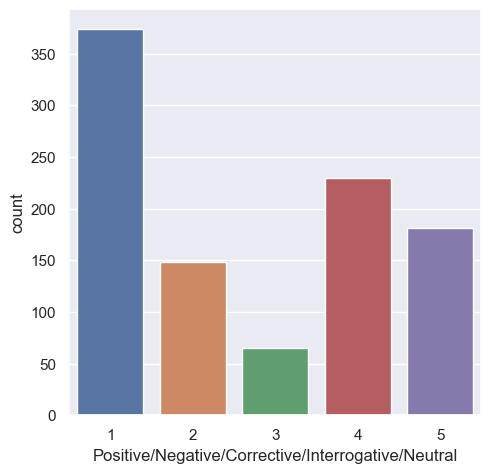

In [14]:
#Plot total number of sentiment

import matplotlib.pyplot as plt
%matplotlib inline
# !pip install seaborn
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,5.27)})

plt.subplot(1,2,1)
news_plt = sns.countplot(x = 'Label', data = df)
news_plt.set_xlabel('Positive/Negative/Corrective/Interrogative/Neutral')
plt.show()

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
vectorizer = TfidfVectorizer(encoding='utf-8')
X = vectorizer.fit_transform(df['Comment']).toarray()
terms = vectorizer.get_feature_names() if hasattr(vectorizer, 'get_feature_names') else vectorizer.vocabulary_.keys()
print(len(terms))

2042


In [17]:
X.shape

(998, 2042)

In [18]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
terms

dict_keys(['subscribed', 'download', 'wil', 'watch', 'depth', 'later', 'excite', 'learn', 'what', 'guy', 'have', 'built', 'could', 'please', 'do', 'erpnext', 'tutorial', 'hate', 'be', 'program', 'head', 've', 'chosen', 'wrong', 'carer', 'lame', 'can', 'share', 'use', 'sharegpt', 'fact', 'video', 'hour', 'non', 'chatgpt', 'one', 'around', 'kind', 'defeat', 'point', 'update', 'web', 'browser', 'people', 'ned', 'course', 'how', 'ask', 'question', 'ah', 'man', 'wel', 'god', 'halucination', 'technical', 'background', 'work', 'fix', 'eror', 'not', 'chat', 'gpt', 'waste', 'time', 'box', 'rock', 'nice', 'make', 'believe', 'world', 'stil', 'place', 'linux', 'year', 'but', 'great', 'interest', 'apreciate', 'gj', 'much', 'beginer', 'ad', 'english', 'subtitle', 'remove', 'bracket', 'timestamps', 'youtube', 'should', 'detect', 'section', 'let', 'navigate', 'interface', 'may', 'also', 'milisecond', 'themis', 'posible', 'create', 'bash', 'script', 'stopstart', 'tomcat', 'holy', 'service', 'rebot', 's

In [20]:
y = df['Label']

In [21]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [22]:
# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X, y = resample.fit_resample(X, y)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# train_size=0.6


# Splitting the data into training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6)

# Splitting the remaining data into validation and test sets
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.2, random_state=0)

# Printing the shapes of the datasets
print("Training set - X:", X_train.shape)
print("Training set - y:", y_train.shape)
print("Validation set - X:", X_valid.shape)
print("Validation set - y:", y_valid.shape)
print("Test set - X:", X_test.shape)
print("Test set - y:", y_test.shape)

Training set - X: (1121, 2042)
Training set - y: (1121,)
Validation set - X: (598, 2042)
Validation set - y: (598,)
Test set - X: (150, 2042)
Test set - y: (150,)


In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Validation Accuracy: 0.7892976588628763
Test Accuracy: 0.88
              precision    recall  f1-score   support

           1       0.86      0.80      0.83        30
           2       0.77      0.95      0.85        21
           3       0.90      1.00      0.95        27
           4       0.89      0.89      0.89        38
           5       0.96      0.79      0.87        34

    accuracy                           0.88       150
   macro avg       0.88      0.89      0.88       150
weighted avg       0.89      0.88      0.88       150



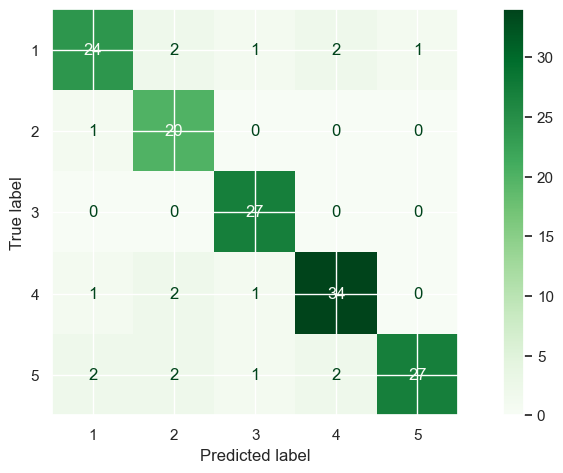

In [26]:
# Create an instance of the Multinomial Naive Bayes model
MNB = MultinomialNB()

# Train the model on the training set
# MNB.fit(X_train_smote, y_train_smote)
MNB.fit(X_train, y_train)
# Evaluate the model on the validation set
valid_accuracy = MNB.score(X_valid, y_valid)
print("Validation Accuracy:", valid_accuracy)

# Evaluate the model on the test set
test_accuracy = MNB.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

pred_MNB = MNB.predict(X_test)
print(classification_report(y_test, pred_MNB)) 
cm = confusion_matrix(y_test, pred_MNB)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=MNB.classes_)
disp.plot(cmap='Greens')
plt.show()

Validation Accuracy: 0.8260869565217391
Test Accuracy: 0.8866666666666667
              precision    recall  f1-score   support

           1       0.81      0.83      0.82        30
           2       0.91      0.95      0.93        21
           3       0.90      1.00      0.95        27
           4       0.92      0.87      0.89        38
           5       0.90      0.82      0.86        34

    accuracy                           0.89       150
   macro avg       0.89      0.90      0.89       150
weighted avg       0.89      0.89      0.89       150



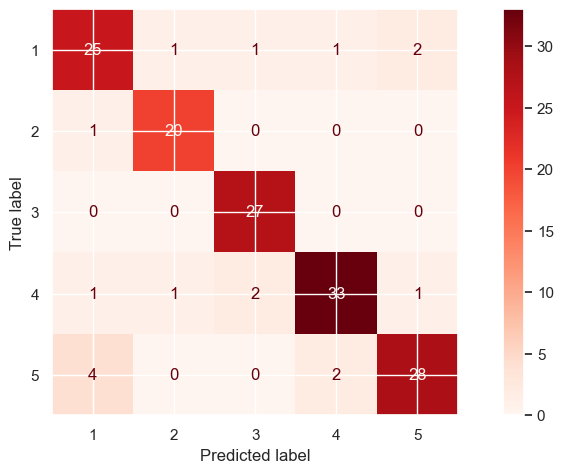

In [27]:
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)
valid_accuracy = LR.score(X_valid, y_valid)
print("Validation Accuracy:", valid_accuracy)

# Evaluate the model on the test set
test_accuracy = LR.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)
pred_LR = LR.predict(X_test)
print(classification_report(y_test, pred_LR)) 
cm = confusion_matrix(y_test, pred_LR)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot(cmap='Reds')
plt.show()

Validation Accuracy: 0.7190635451505016
Test Accuracy: 0.72
              precision    recall  f1-score   support

           1       0.54      0.70      0.61        30
           2       0.65      0.81      0.72        21
           3       0.77      0.85      0.81        27
           4       0.81      0.68      0.74        38
           5       0.91      0.62      0.74        34

    accuracy                           0.72       150
   macro avg       0.74      0.73      0.72       150
weighted avg       0.75      0.72      0.72       150



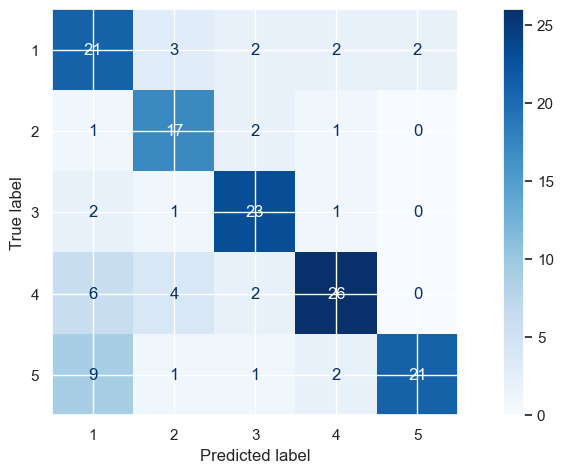

In [28]:
DT = DecisionTreeClassifier(random_state=0)
DT.fit(X_train, y_train)
valid_accuracy = DT.score(X_valid, y_valid)
print("Validation Accuracy:", valid_accuracy)

# Evaluate the model on the test set
test_accuracy = DT.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)
pred_DT = DT.predict(X_test)
print(classification_report(y_test, pred_DT)) 
cm = confusion_matrix(y_test, pred_DT)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot(cmap='Blues')
plt.show()

Validation Accuracy: 0.8177257525083612
Test Accuracy: 0.84
              precision    recall  f1-score   support

           1       0.59      0.90      0.71        30
           2       1.00      0.95      0.98        21
           3       1.00      0.89      0.94        27
           4       0.86      0.84      0.85        38
           5       1.00      0.68      0.81        34

    accuracy                           0.84       150
   macro avg       0.89      0.85      0.86       150
weighted avg       0.88      0.84      0.85       150



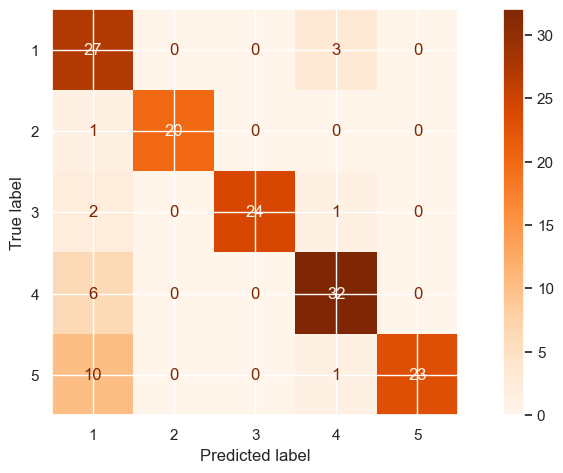

In [29]:
RF = RandomForestClassifier(max_depth=200,random_state=0)
RF.fit(X_train, y_train)
valid_accuracy = RF.score(X_valid, y_valid)
print("Validation Accuracy:", valid_accuracy)

# Evaluate the model on the test set
test_accuracy = RF.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)
pred_RF = RF.predict(X_test)
print(classification_report(y_test, pred_RF)) 
cm = confusion_matrix(y_test, pred_RF)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Oranges')
plt.show()

Validation Accuracy: 0.8511705685618729
Test Accuracy: 0.8866666666666667
              precision    recall  f1-score   support

           1       0.64      1.00      0.78        30
           2       1.00      0.90      0.95        21
           3       1.00      1.00      1.00        27
           4       1.00      0.74      0.85        38
           5       1.00      0.85      0.92        34

    accuracy                           0.89       150
   macro avg       0.93      0.90      0.90       150
weighted avg       0.93      0.89      0.89       150



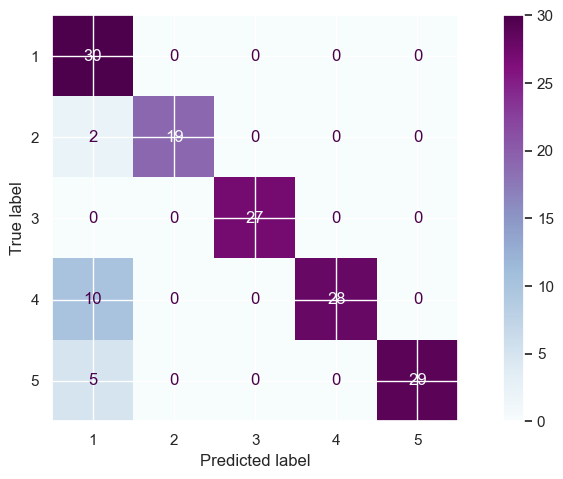

In [30]:
KNN= KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train, y_train)
valid_accuracy = KNN.score(X_valid, y_valid)
print("Validation Accuracy:", valid_accuracy)

# Evaluate the model on the test set
test_accuracy = KNN.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)
pred_KNN = KNN.predict(X_test)
print(classification_report(y_test, pred_KNN)) 
cm = confusion_matrix(y_test, pred_KNN)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=KNN.classes_)
disp.plot(cmap='BuPu')
plt.show()

Validation Accuracy: 0.8712374581939799
Test Accuracy: 0.9266666666666666
              precision    recall  f1-score   support

           1       0.77      1.00      0.87        30
           2       1.00      0.95      0.98        21
           3       1.00      1.00      1.00        27
           4       0.94      0.89      0.92        38
           5       1.00      0.82      0.90        34

    accuracy                           0.93       150
   macro avg       0.94      0.93      0.93       150
weighted avg       0.94      0.93      0.93       150



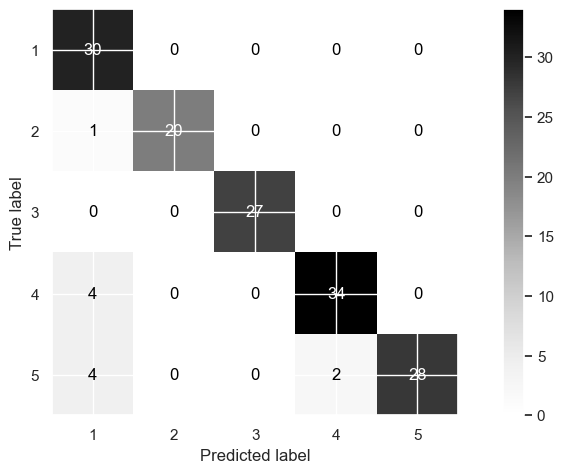

In [31]:
SVM = svm.SVC(decision_function_shape='ovo')
SVM.fit(X_train, y_train)
valid_accuracy = SVM.score(X_valid, y_valid)
print("Validation Accuracy:", valid_accuracy)

# Evaluate the model on the test set
test_accuracy = SVM.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

pred_SVM = SVM.predict(X_test)
print(classification_report(y_test, pred_SVM)) 
cm = confusion_matrix(y_test, pred_SVM)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVM.classes_)
disp.plot(cmap='Greys')
plt.show()